In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#checking null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.shape

(284807, 31)

In [7]:
data.drop_duplicates(inplace = True)

In [8]:
data.shape

(283726, 31)

In [9]:
data.drop(columns = ['Time'], inplace=True)

In [10]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
data.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [12]:
#this is highly imbalanced data set we can make it balanced using over-sampling or under sampling

In [13]:
legal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [14]:
legal.shape

(283253, 30)

In [15]:
fraud.shape

(473, 30)

In [16]:
legal.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
data.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [19]:
#Undersampling

In [20]:
fraud.shape

(473, 30)

In [21]:
legal_sample = legal.sample(n=473)

In [22]:
legal_sample.shape

(473, 30)

In [23]:
data_undersample = pd.concat([legal_sample, fraud] , ignore_index=True)

In [24]:
data_undersample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2.005000,-0.974257,-1.792474,-0.426694,-0.284931,-0.852834,0.057731,-0.388877,-0.519613,0.856468,...,-0.506178,-1.139101,0.107858,-0.731464,-0.175979,0.513569,-0.095393,-0.051609,129.00,0
1,1.234841,0.022104,0.403055,0.108633,-0.592232,-1.071078,0.040410,-0.261134,0.099114,-0.164732,...,-0.103454,-0.323706,0.032121,0.469034,0.221806,0.897354,-0.080864,0.012201,31.35,0
2,0.821819,-1.037763,0.796493,0.149006,-1.004713,0.645931,-0.649930,0.345639,1.020545,-0.390769,...,-0.079574,-0.376456,-0.085882,-0.226418,-0.001701,0.958413,-0.056684,0.025837,177.44,0
3,0.820234,-0.560304,-0.382359,0.514699,-0.437902,-1.288475,0.641205,-0.504468,1.214842,-0.552877,...,-0.048716,-0.497388,-0.296044,0.407919,0.408196,1.006299,-0.194467,0.028572,268.80,0
4,0.260141,0.711915,0.207679,-0.660160,0.751083,-1.137021,1.303275,-0.539050,0.040207,-0.459287,...,0.264394,1.024656,-0.324412,-0.076461,0.009287,-0.205550,-0.110362,-0.186981,7.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [25]:
data_undersample.shape

(946, 30)

In [26]:
data_undersample.Class.value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [27]:
#splitting the data now

In [28]:
x = data_undersample.drop(columns=['Class'])
y = data_undersample['Class']

In [29]:
x.shape

(946, 29)

In [30]:
y.shape

(946,)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [32]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(756, 29) (190, 29) (756,) (190,)


In [33]:
scaler = StandardScaler()

In [34]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

In [35]:
model = LogisticRegression()

In [36]:
model.fit(x_train_scale, y_train)

LogisticRegression()

In [37]:
pred = model.predict(x_test_scale)

In [38]:
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(pred, y_test)

0.9526315789473684

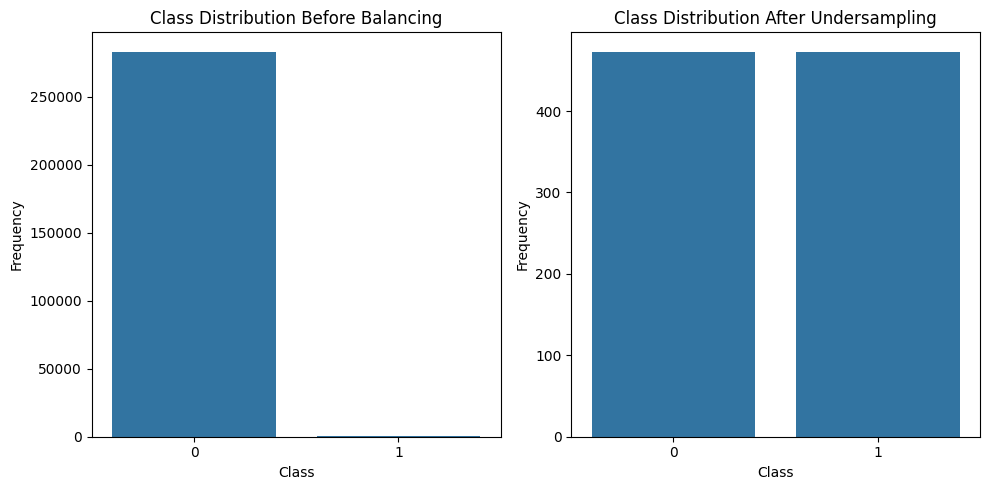

In [41]:
# Plotting
plt.figure(figsize=(10, 5))

# Class distribution before balancing
plt.subplot(1, 2, 1)
sns.countplot(x='Class', data=data)
plt.title('Class Distribution Before Balancing')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Class distribution after undersampling
plt.subplot(1, 2, 2)
sns.countplot(x='Class', data=data_undersample)
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

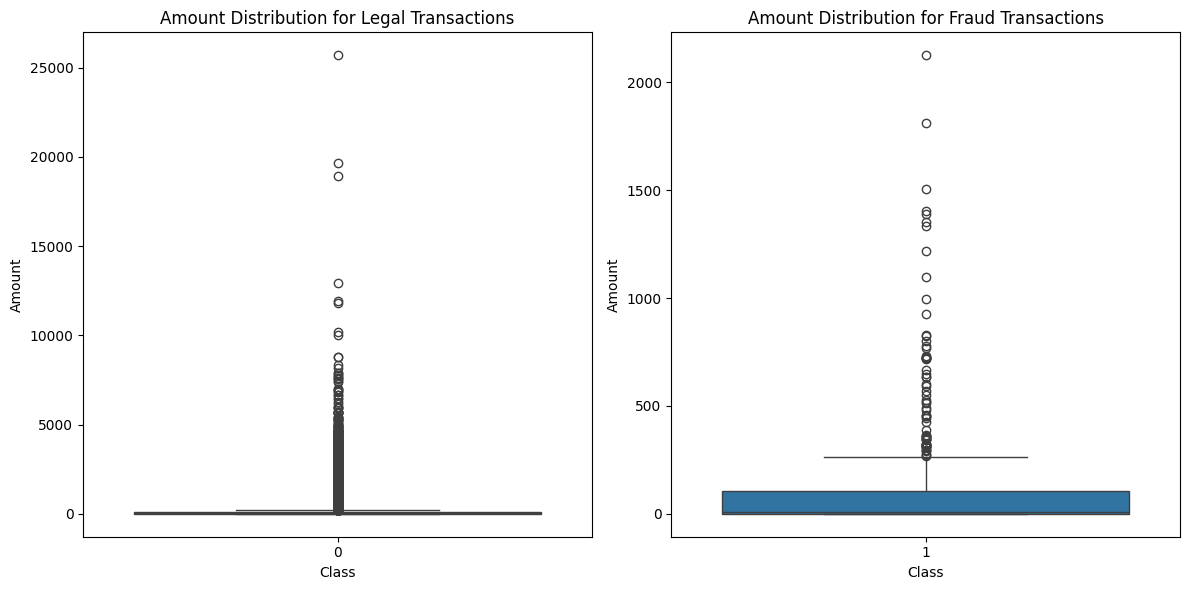

In [42]:
# Amount distribution for legal and fraud transactions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', data=legal)
plt.title('Amount Distribution for Legal Transactions')
plt.xlabel('Class')
plt.ylabel('Amount')

plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Amount', data=fraud)
plt.title('Amount Distribution for Fraud Transactions')
plt.xlabel('Class')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

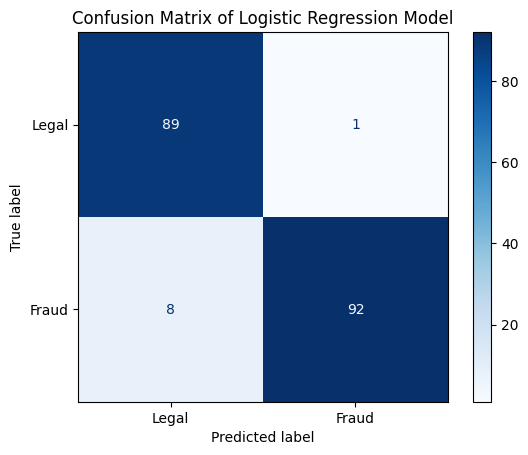

In [43]:
# Confusion matrix
cm = confusion_matrix(y_test, pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Legal', 'Fraud'])

plt.figure(figsize=(8, 6))
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()